# Previsão de diabetes, batimentos cardíacos e nível de colesterol dos pacientes


Autora: Luana Fraga de Andrade Araujo

E-mail: luafraga1@hotmail.com

LinkedIn: www.linkedin.com/in/luana-fraga-63a794193/

Github: https://github.com/luanafraga

# Objetivo do Projeto

O objetivo deste projeto é criar modelos para previsão de:
   
   - **Teste Positivo ou Negativo para Diabetes** de acordo com a Idade, IMC, Concentração de Glicose etc ;
    
   - **Batimentos Cardíacos** de acordo com o Peso e Horas de atividade física ;
   
   - **Nível de Colesterol** de acordo com a Idade, Gênero, Tipo de dor no peito, etc.

# Base de dados

A base de dados possui informações sobre:
    
   - **Diabetes**:
        - quantidade gravidez
        - concentração glicose
        - pressão
        - espessura tríceps
        - insulina
        - imc
        - diabetes pedigree
        - idade
        - resultado
        
   - **Batimentos cardíacos**:
        - idade
        - peso
        - horas de atividade
        - batimentos cardíacos
       
   - **Colesterol**:
        - idade
        - gênero
        - tipo dor peito
        - pressão sanguínea repouso
        - açúcar jejum
        - resultado eletrocardio
        - freq cardio max
        - angina exercicio
        - depressão induzida exercicio
        - inclinação
        - num princ vasos
        - thal
        - diag doenca cardiaca
        - colesterol

## Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np

# para visualização dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# para criação e validação dos modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn import linear_model
from sklearn.cluster import KMeans

# para garantir a replicabilidade do código
SEED = 100

In [3]:
#definindo paleta e estilo dos gráficos
sns.set_palette('pastel')
sns.set_style('white')

## Leitura dos dados

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [5]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [6]:
batimentos = pd.read_csv('batimentos cardiacos.csv')
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [7]:
colesterol = pd.read_csv('colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


## Informações do DataFrame Diabetes

In [8]:
diabetes.shape

(768, 9)

In [9]:
print(f'Nossa base de dados DIABETES tem {diabetes.shape[0]} linhas e {diabetes.shape[1]} colunas.')

Nossa base de dados DIABETES tem 768 linhas e 9 colunas.


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quantidade_gravidez   768 non-null    int64  
 1   concentracao_glicose  768 non-null    int64  
 2   pressao               768 non-null    int64  
 3   espessura_triceps     768 non-null    int64  
 4   insulina              768 non-null    int64  
 5   imc                   768 non-null    float64
 6   diabetes_pedigree     768 non-null    float64
 7   idade                 768 non-null    int64  
 8   resultado             768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [11]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
quantidade_gravidez,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
concentracao_glicose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressao,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
espessura_triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
imc,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetes_pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
idade,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


Para começar a análise, vamos utilizar o método **.describe()** para entender alguns métodos estatísticos que temos dentro da base de dados. O método describe() fornece as informações sobre:

- Para variáveis **quantitativas**:

   - **count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

   - **mean** - O valor médio, em média aritmética. 

   - **std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

   - **min e max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

   - **quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

In [12]:
duplicados = diabetes.duplicated().sum()
duplicados

0

In [13]:
nulos = diabetes.isna().sum().sum()
nulos

0

In [14]:
print(f'Contém {duplicados} dados duplicados e {nulos} dados nulos.')

Contém 0 dados duplicados e 0 dados nulos.


## Análise exploratória do DataFrame Diabetes

In [15]:
diabetes.value_counts(subset='resultado', normalize=True)

resultado
testado_negativo    0.651042
testado_positivo    0.348958
dtype: float64

**65% dos pacientes testaram negativo para diabetes e 35% testaram positivo**.

### Comparando a variável resultado_diabetes com as demais

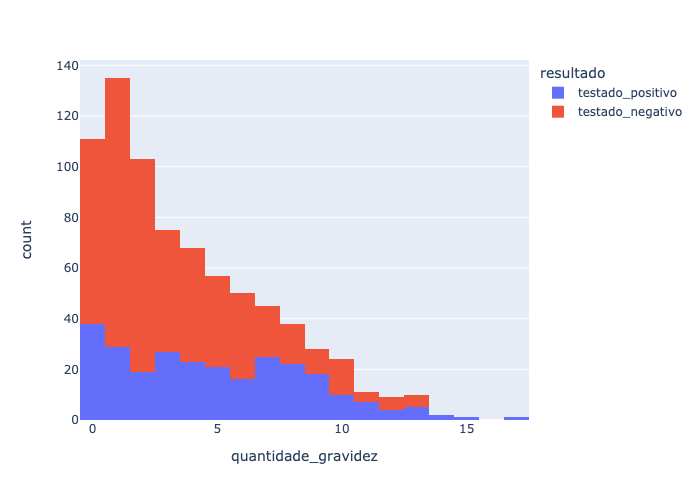

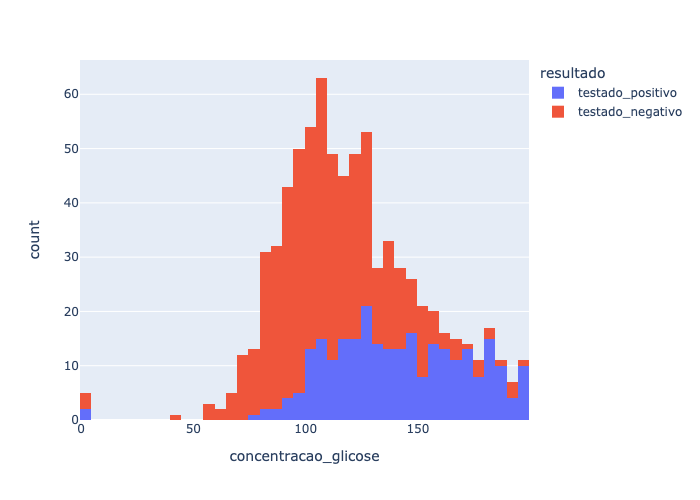

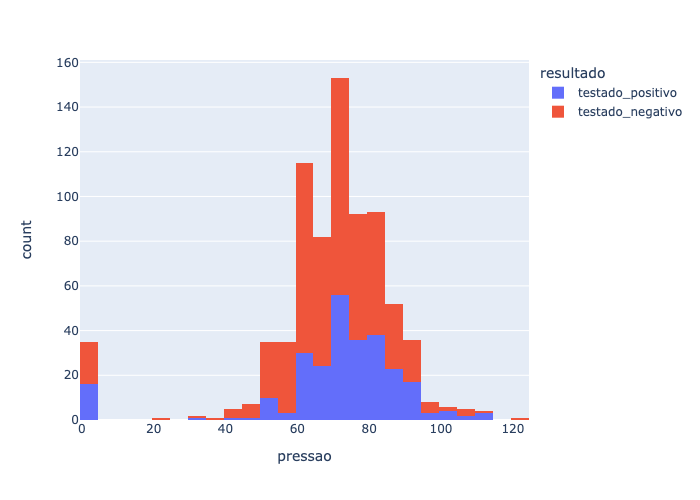

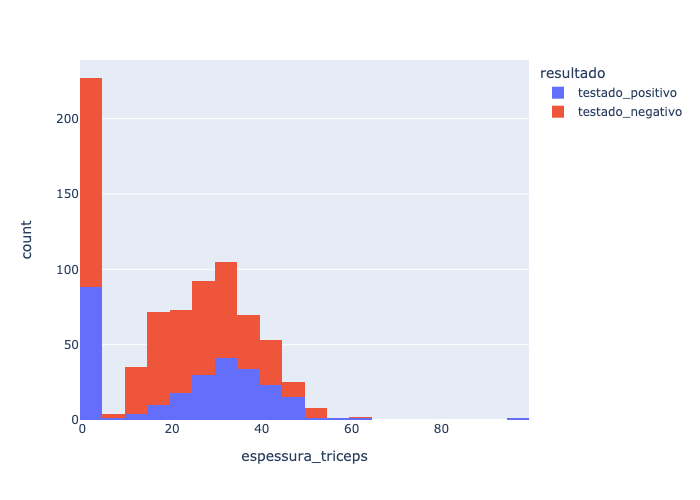

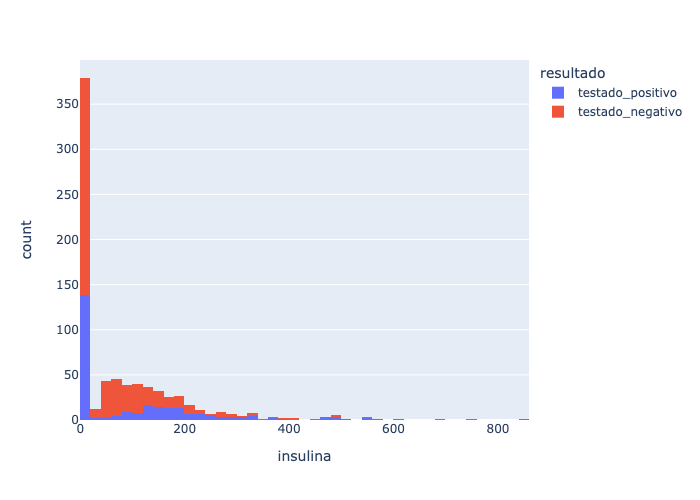

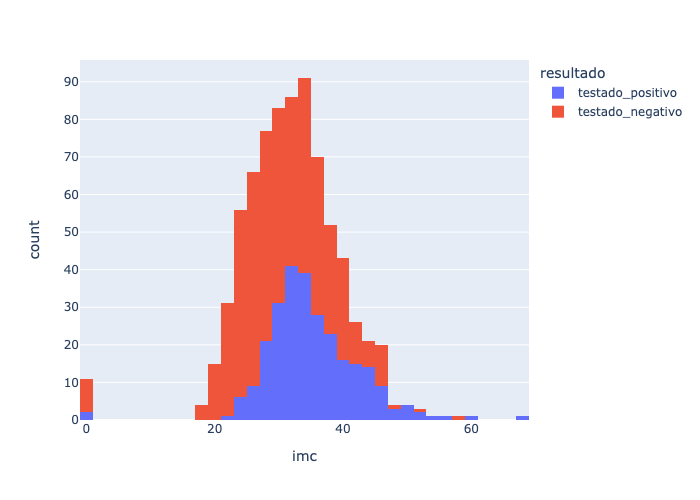

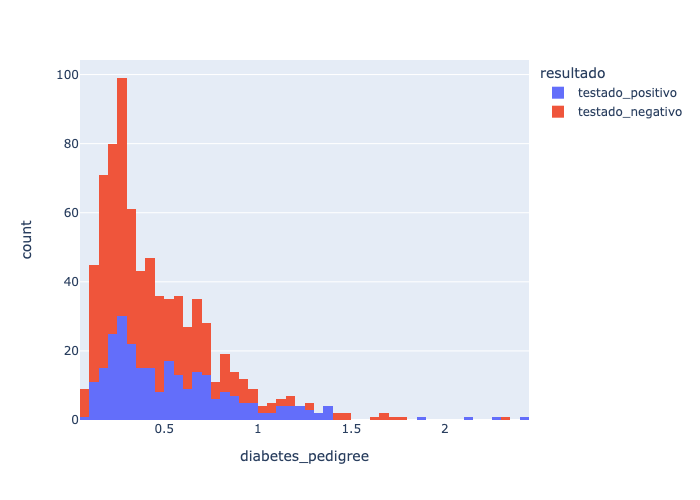

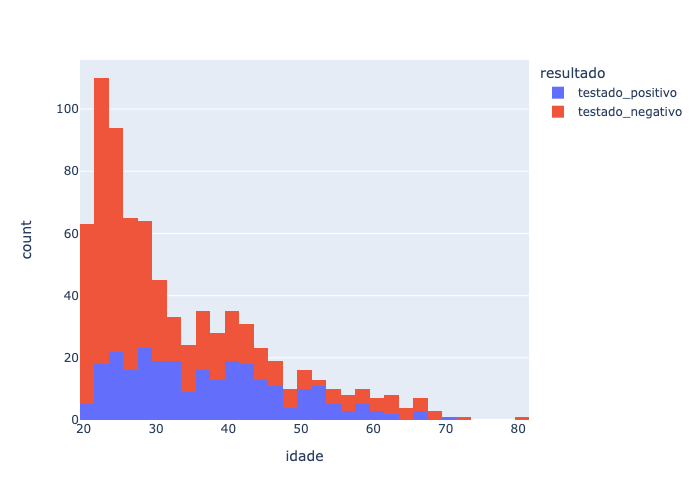

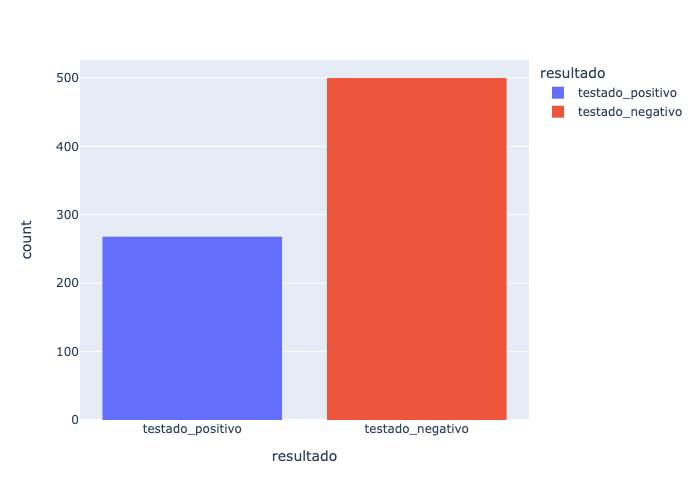

In [16]:
for coluna in diabetes.columns:
    
    fig = px.histogram(diabetes, x=coluna, color="resultado")
    fig.show('png')

### Matriz de Correlação

In [17]:
dic = {'testado_negativo':0, 'testado_positivo':1}
diabetes.resultado = diabetes.resultado.map(dic)

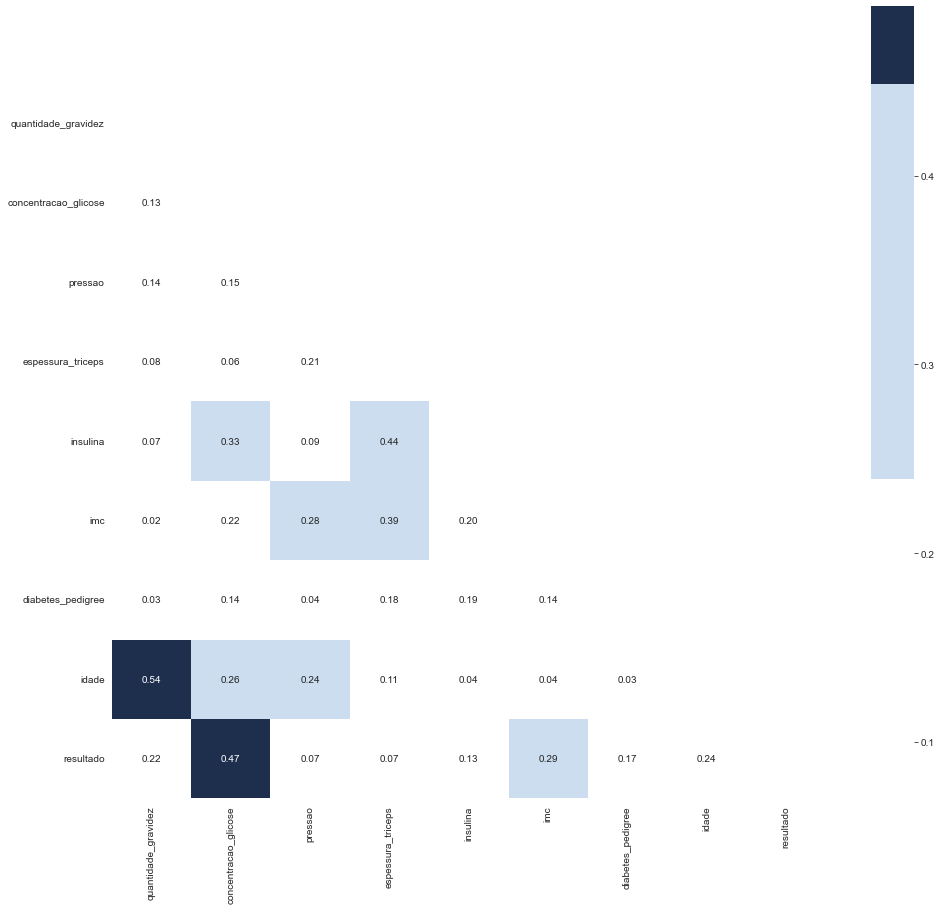

In [18]:
matrix_corr = diabetes.corr().abs()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=['#ffffff','#ccddef','#1e2f4d','#feb930'], center=0.45, robust=True, annot= True, fmt=".2f")

- Variáveis com maior correlação com a target **resultado**:
    - **Concetração de Glicose**
    - **IMC**
    - **Idade**

In [19]:
def histograma(dados, x_col, xlabel, titulo):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(data=diabetes.query('resultado==0'), x=x_col, ax=axes[0])
    axes[0].set_title('Distribuição dos pacientes sem diabetes', fontsize=14, style='italic')
    axes[0].set_xlabel(xlabel, fontsize=12)
    axes[0].set_ylabel('Nº de pacientes', fontsize=12)

    sns.histplot(data=diabetes.query('resultado==1'), x=x_col, ax=axes[1], color='lightsalmon')
    axes[1].set_title('Distribuição dos pacientes com diabetes', fontsize=14, style='italic')
    axes[1].set_xlabel(xlabel, fontsize=12)
    axes[1].set_ylabel('Nº de pacientes', fontsize=12)
    fig.suptitle(f'Distribuição {titulo}', fontsize=18, weight='bold', color='#164980')
    plt.show()

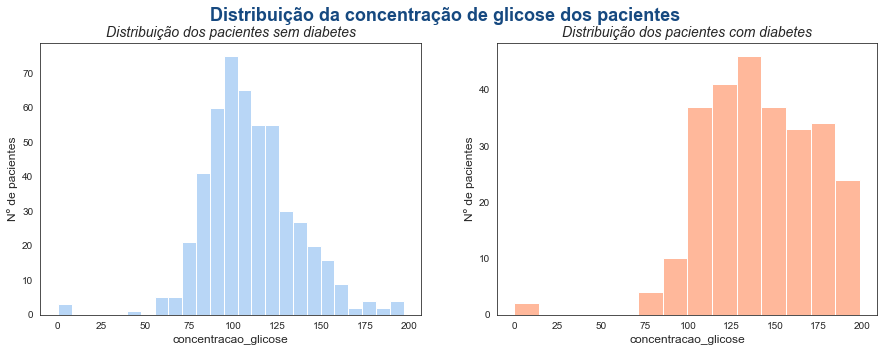

In [20]:
histograma(diabetes, x_col='concentracao_glicose', xlabel = 'concentracao_glicose', titulo = 'da concentração de glicose dos pacientes')

Pacientes com resultado **NEGATIVO** para Diabetes possui uma maior concentração de Glicose na faixa de **75 - 125**.

Pacientes com resultado **POSITIVO** para Diabetes possui uma maior concentração de Glicose na faixa de **100 - 200**.

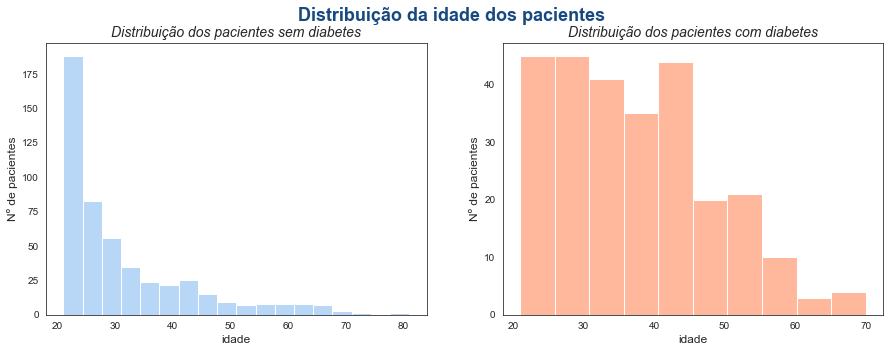

In [21]:
histograma(diabetes, x_col='idade', xlabel = 'idade', titulo = 'da idade dos pacientes')

Pacientes com resultado **NEGATIVO** para Diabetes estão mais concentrados na faixa de **20 - 30 anos** de idade.

Pacientes com resultado **POSITIVO** para Diabetes estão mais concentrados na faixa de **20 - 60 anos** de idade.

## Informações do DataFrame Batimentos Cardiacos

In [22]:
batimentos.shape

(1000, 4)

In [23]:
print(f'Nossa base de dados BATIMENTOS CARDIACOS tem {batimentos.shape[0]} linhas e {batimentos.shape[1]} colunas.')

Nossa base de dados BATIMENTOS CARDIACOS tem 1000 linhas e 4 colunas.


In [24]:
batimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1000 non-null   float64
 1   Peso                  1000 non-null   float64
 2   Horas de atividade    1000 non-null   float64
 3   Batimentos cardiacos  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [25]:
batimentos.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1000.0,65.845210,8.505102,40.0,60.219824,65.735216,71.462362,90.0
Peso,1000.0,122.704671,27.216325,40.0,104.703436,122.352692,140.679557,200.0
Horas de atividade,1000.0,20.676168,6.804081,0.0,16.175859,20.588173,25.169889,40.0
Batimentos cardiacos,1000.0,138.168423,21.521514,70.0,123.926952,137.747897,151.993406,200.0


In [26]:
duplicados = batimentos.duplicated().sum()
duplicados

0

In [27]:
nulos = batimentos.isna().sum().sum()
nulos

0

In [28]:
print(f'Contém {duplicados} dados duplicados e {nulos} dados nulos.')

Contém 0 dados duplicados e 0 dados nulos.


## Análise exploratória do DataFrame Batimentos

### Comparando a variável Batimentos com as demais

Criando a variável 'faixa_batimentos': 

    70 - 90 batimentos = 1
    91 - 110 batimentos = 2
    111 - 130 batimentos = 3
    131 - 150 batimentos = 4
    151 - 170 batimentos = 5
    171 - 200 batimentos = 6

In [29]:
batimentos['faixa_batimentos'] = pd.cut(x = batimentos['Batimentos cardiacos'], bins=[69, 90, 110, 130, 150, 170, 200], labels = [1, 2, 3, 4, 5, 6])
batimentos

,Idade,Peso,Horas de atividade,Batimentos cardiacos,faixa_batimentos
0,44.247295,53.591343,3.397836,82.307425,1
1,81.427930,172.569375,33.142344,179.045377,6
2,50.807130,74.582817,8.645704,103.522796,2
3,55.778712,90.491878,12.622969,114.239779,3
4,53.790400,84.129280,11.032320,107.184063,2
...,...,...,...,...,...
995,86.385062,188.432199,37.108050,189.035111,6
996,63.631394,115.620461,18.905115,130.773648,4
997,71.200887,139.842839,24.960710,150.330074,5
998,62.487213,111.959082,17.989771,129.754953,3


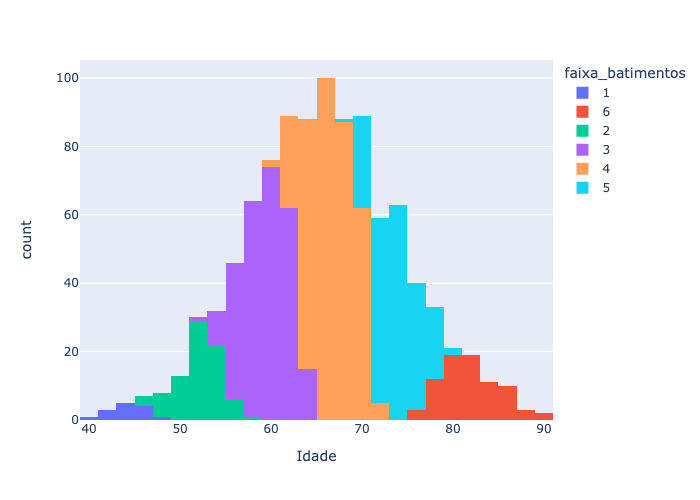

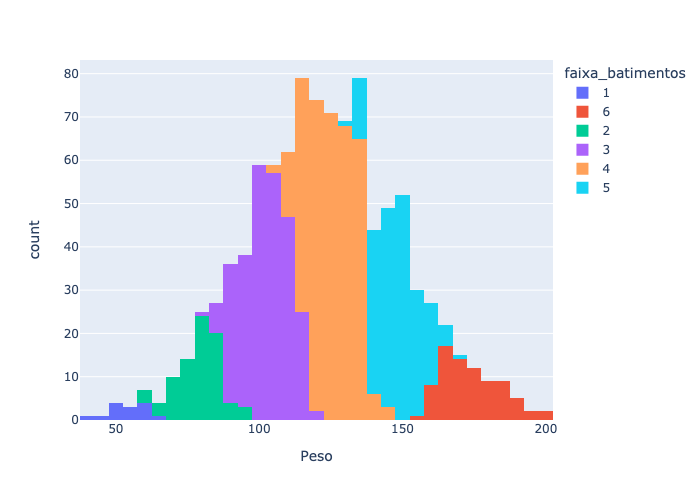

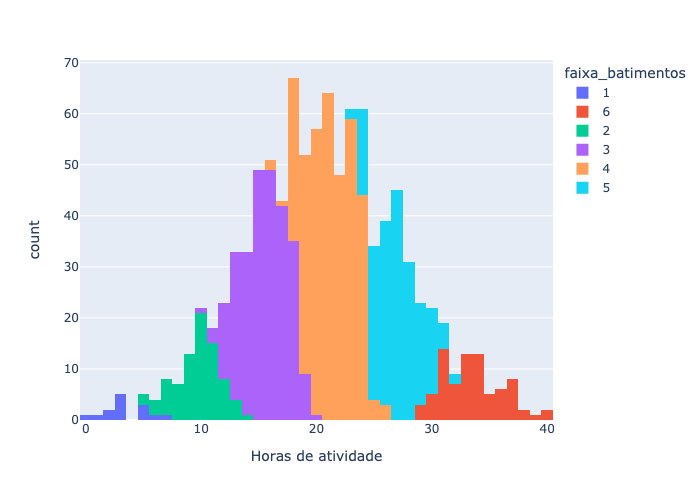

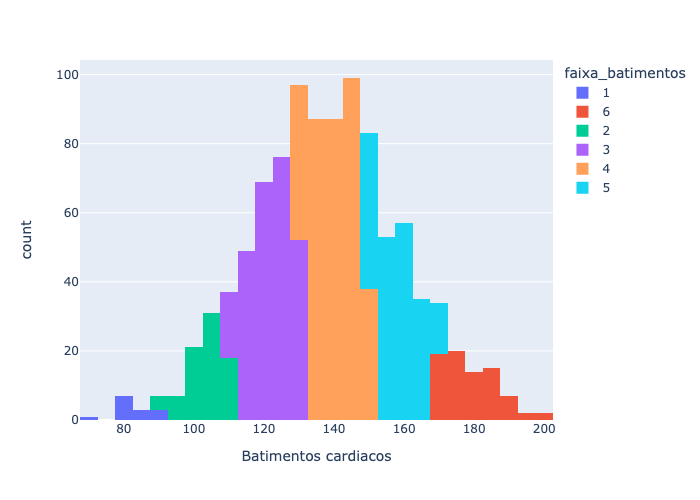

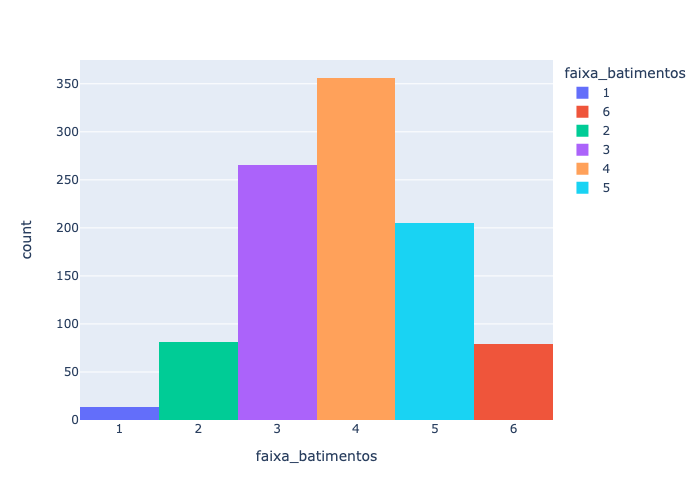

In [30]:
for coluna in batimentos.columns:
    
    fig = px.histogram(batimentos, x=coluna, color="faixa_batimentos")
    fig.show('png')

### Matriz de Correlação

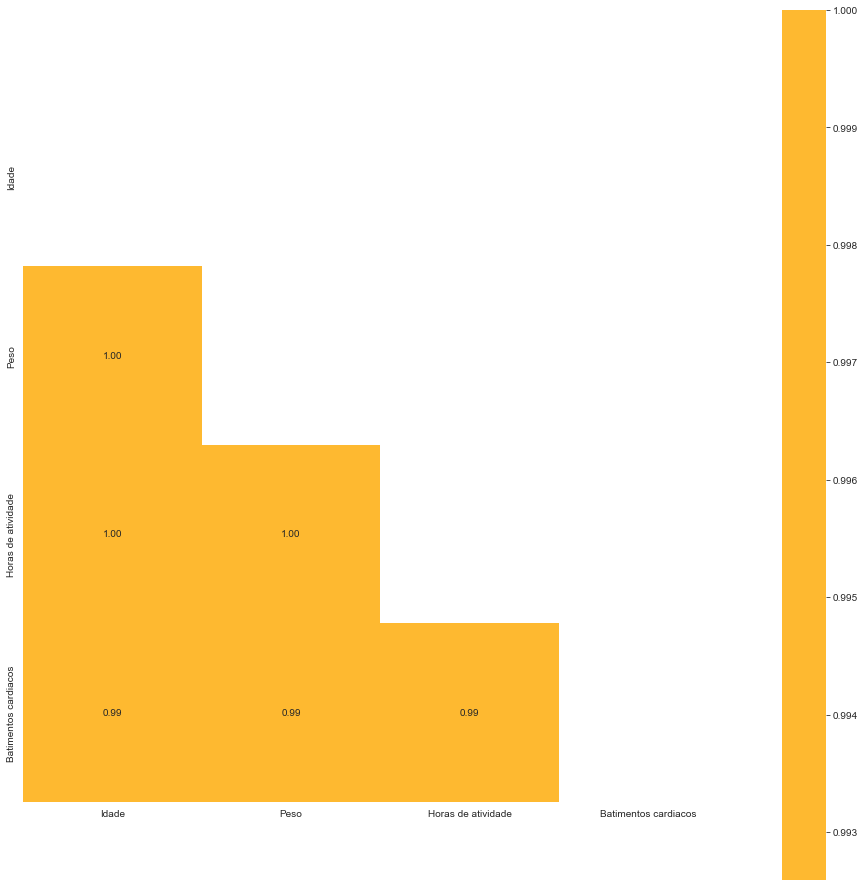

In [31]:
matrix_corr = batimentos.corr().abs()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=['#ffffff','#ccddef','#1e2f4d','#feb930'], center=0.45, robust=True, annot= True, fmt=".2f")

Todas as variáveis são **altamente correlacionadas** com o total de batimentos cardíacos.

<Figure size 720x360 with 0 Axes>

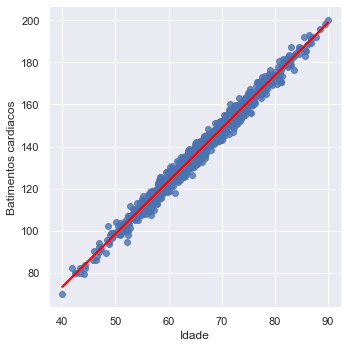

In [32]:
sns.set()
plt.figure(figsize=(10,5))

sns.lmplot(x='Idade', y='Batimentos cardiacos', data=batimentos,
          line_kws={'color':'red'})
plt.show()

<Figure size 720x360 with 0 Axes>

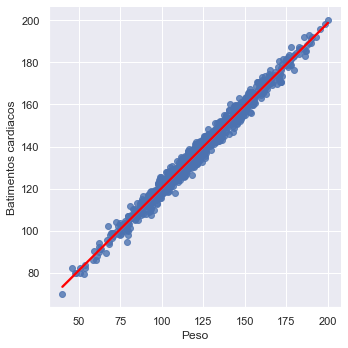

In [33]:
sns.set()
plt.figure(figsize=(10,5))

sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos,
          line_kws={'color':'red'})
plt.show()

## Informações do DataFrame Colesterol

In [34]:
colesterol.shape

(303, 14)

In [35]:
print(f'Nossa base de dados COLESTEROL tem {colesterol.shape[0]} linhas e {colesterol.shape[1]} colunas.')

Nossa base de dados COLESTEROL tem 303 linhas e 14 colunas.


In [36]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [37]:
colesterol.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
genero,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
tipo_dor_peito,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
pressao_sanguinea_repouso,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
acucar_jejum,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resultado_eletrocardio,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
freq_cardio_max,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
angina_exercicio,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
depressao_induzida_exercicio,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
inclinacao,303.0,1.600660,0.616226,1.0,1.0,2.0,2.0,3.0


In [38]:
duplicados = colesterol.duplicated().sum()
duplicados

0

In [39]:
nulos = colesterol.isna().sum().sum()
nulos

0

In [40]:
print(f'Contém {duplicados} dados duplicados e {nulos} dados nulos.')

Contém 0 dados duplicados e 0 dados nulos.


## Análise exploratória do DataFrame Colesterol

### Comparando a variável Colesterol com as demais

Criando a variável 'faixa_colesterol': 

    126 - 200 = 1
    201 - 275 = 2
    276 - 350 = 3
    351 - 420 = 4
    421 - 500 = 5
    501 - 564 = 6

In [41]:
colesterol['faixa_colesterol'] = pd.cut(x = colesterol['colesterol'], bins=[125, 200, 275, 350, 420, 500, 564], labels = [1, 2, 3, 4, 5, 6])
colesterol

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,faixa_colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,2
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,3
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,2
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,2
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264,2
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193,1
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131,1
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236,2


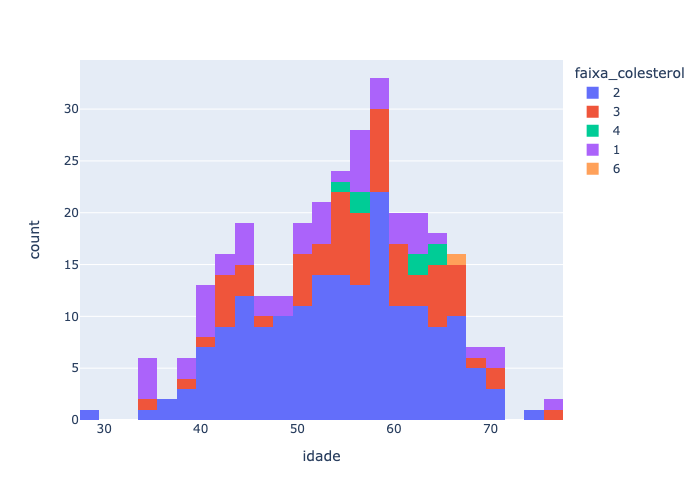

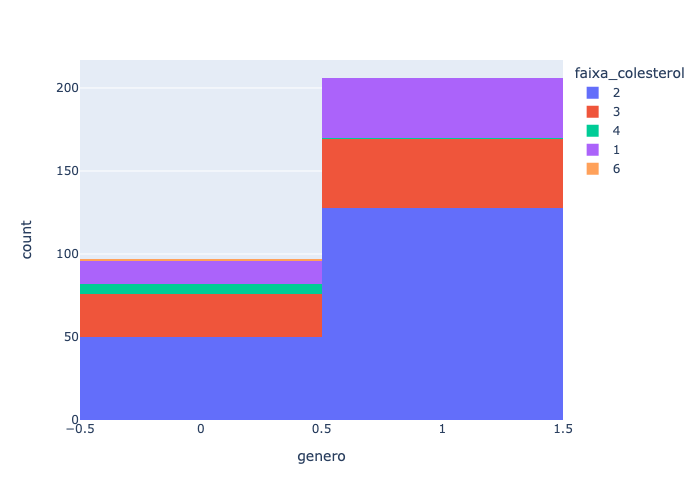

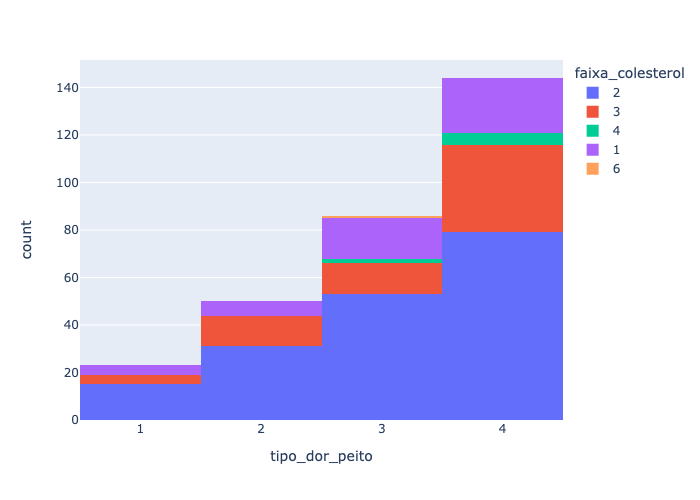

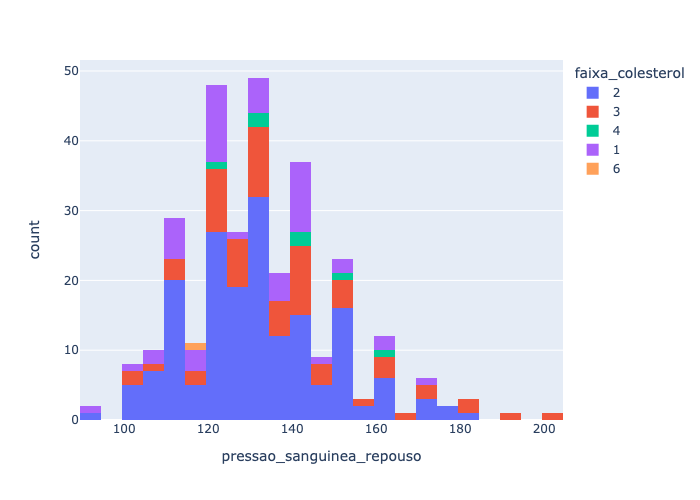

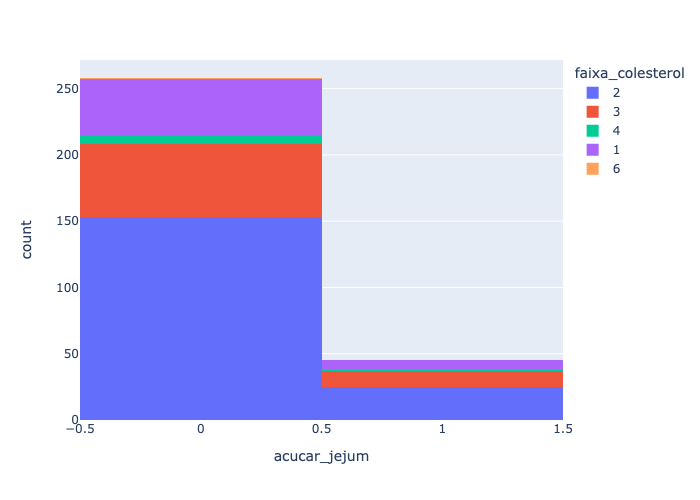

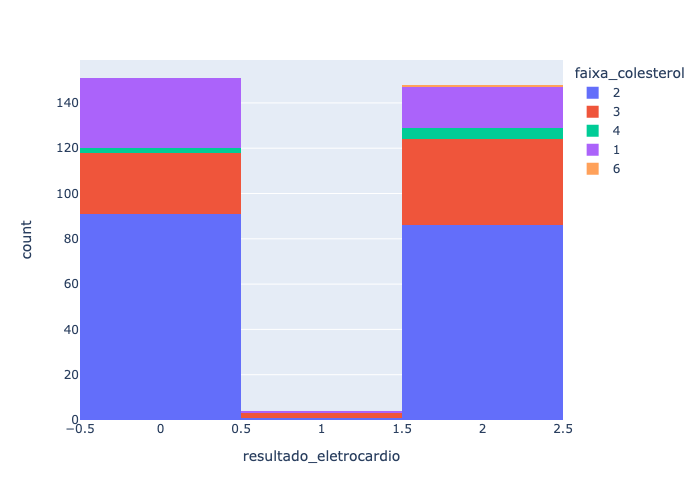

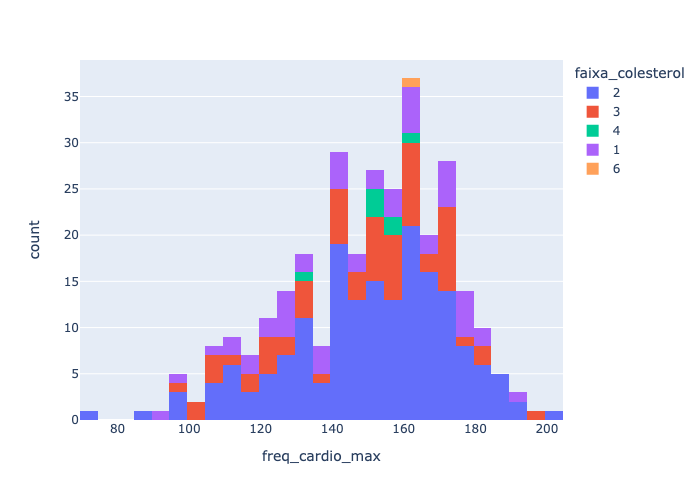

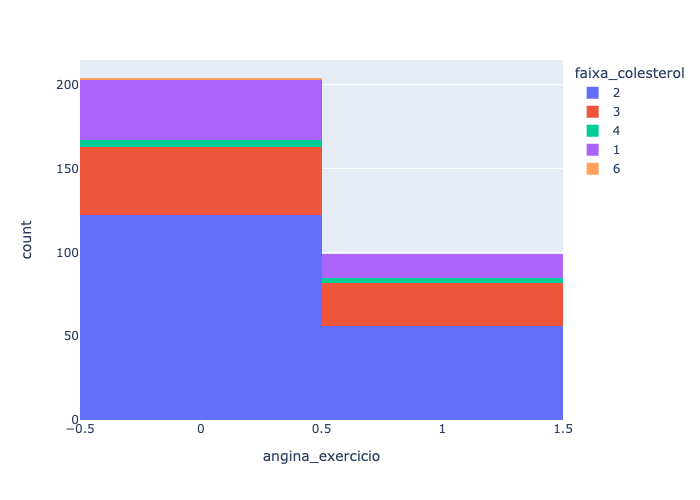

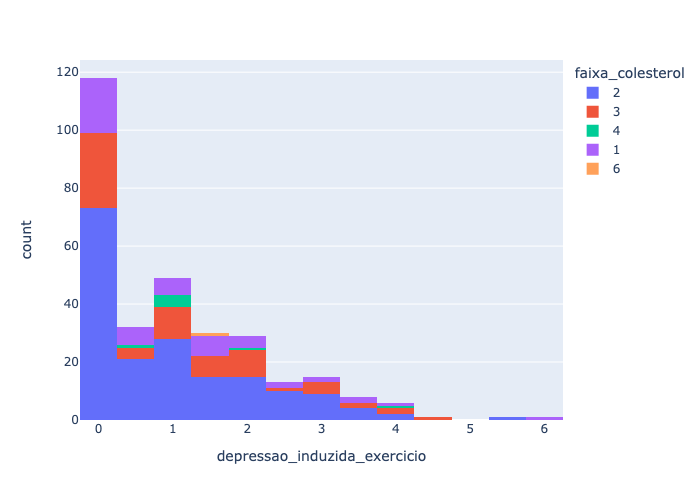

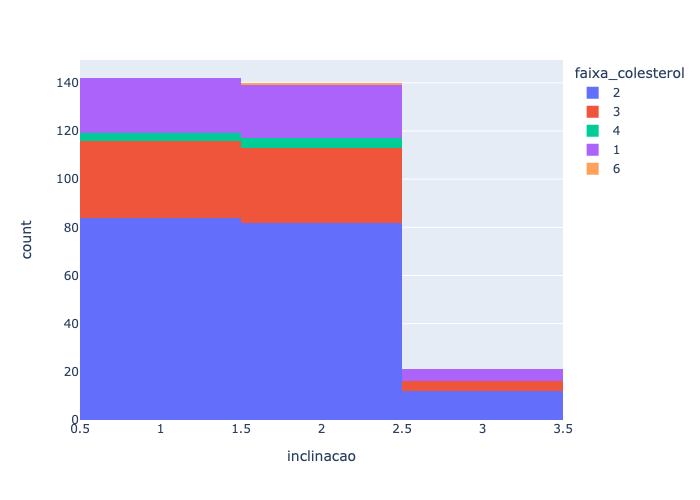

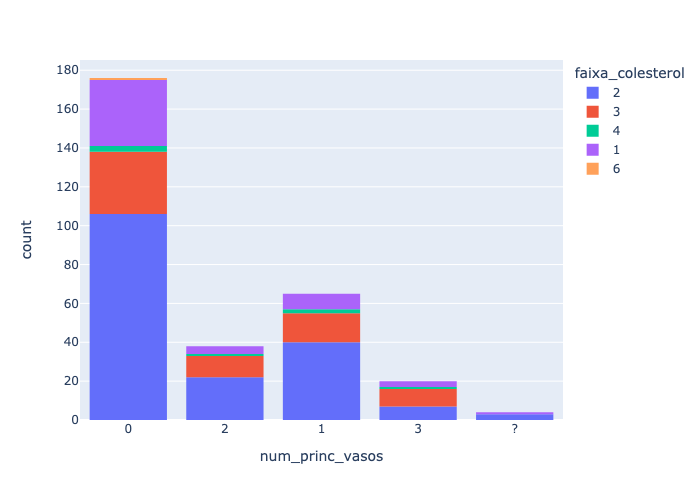

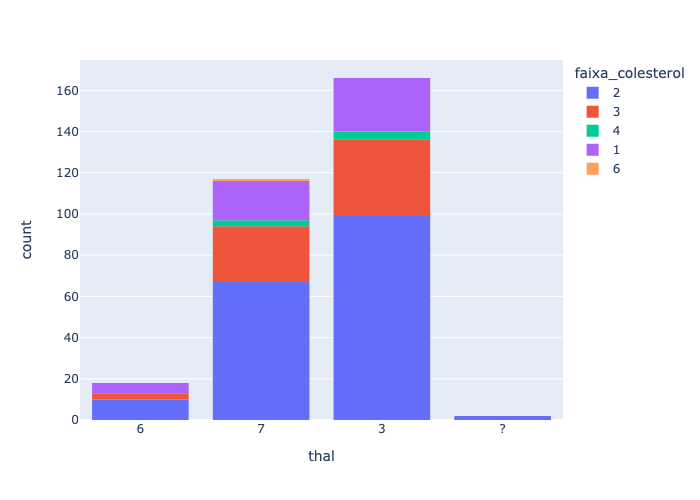

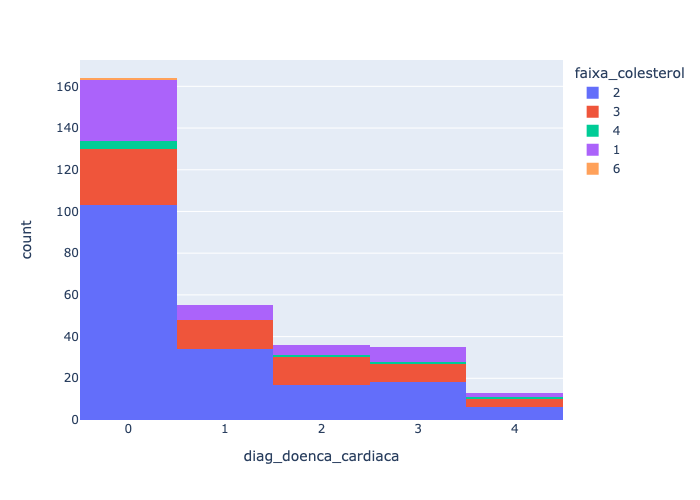

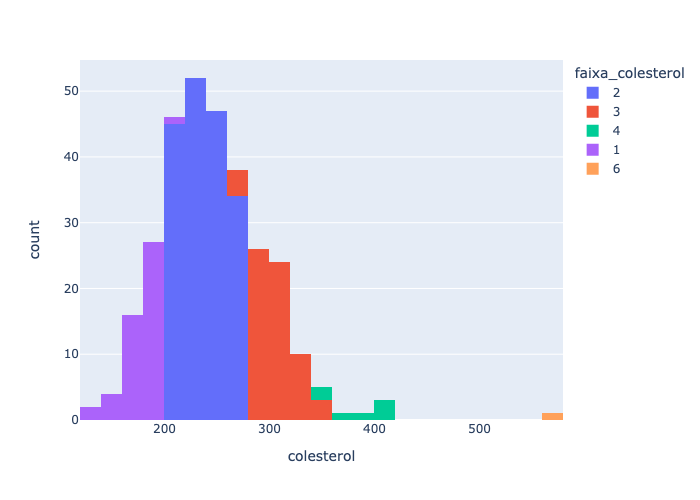

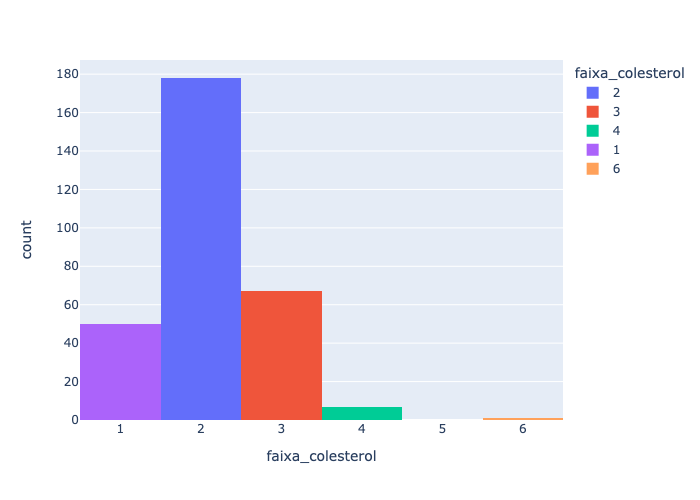

In [42]:
for coluna in colesterol.columns:
    
    fig = px.histogram(colesterol, x=coluna, color="faixa_colesterol")
    fig.show('png')

### Matriz de Correlação

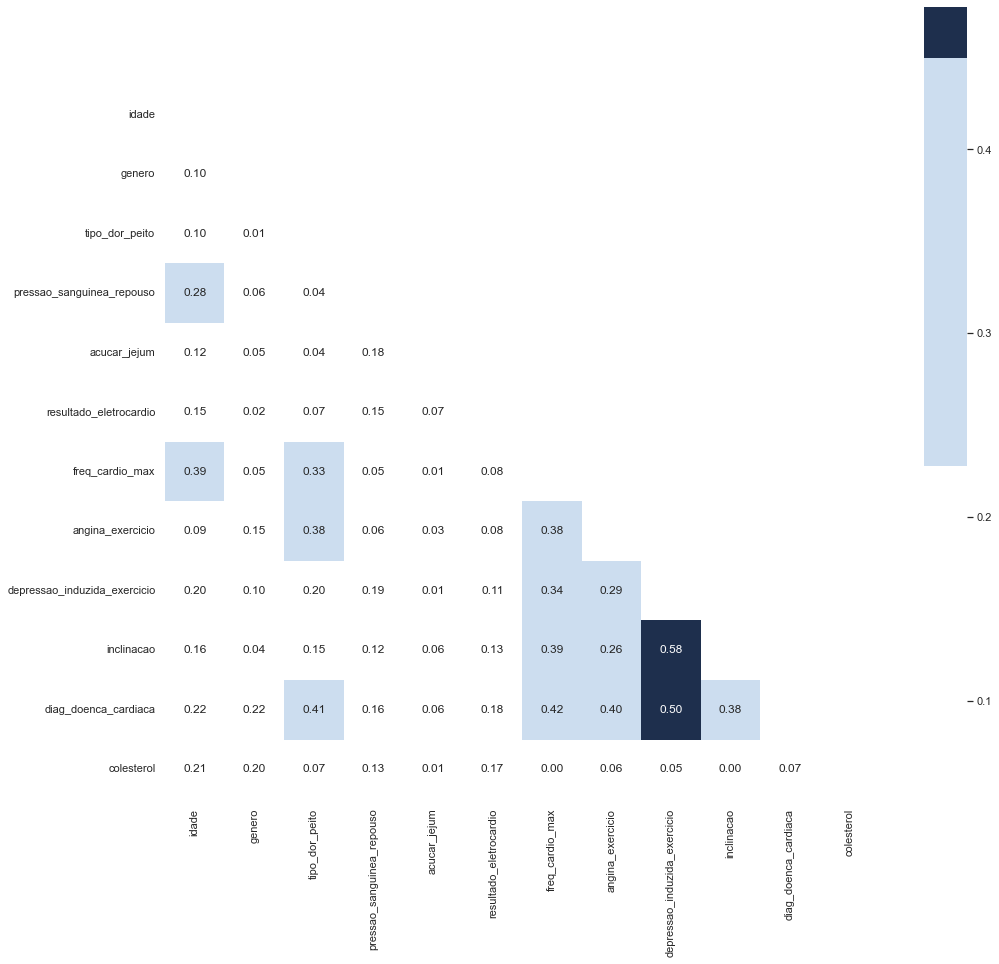

In [43]:
matrix_corr = colesterol.corr().abs()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=['#ffffff','#ccddef','#1e2f4d','#feb930'], center=0.45, robust=True, annot= True, fmt=".2f")

Variáveis com maior correlação (porém não muito alta) com valor do colesterol é:

   - **Idade**
   - **Pressão Sanguínea**

<Figure size 720x360 with 0 Axes>

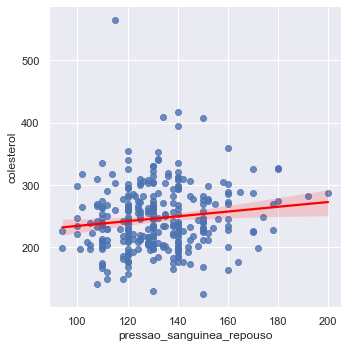

In [44]:
sns.set()
plt.figure(figsize=(10,5))

sns.lmplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol,
          line_kws={'color':'red'})
plt.show()

<Figure size 720x360 with 0 Axes>

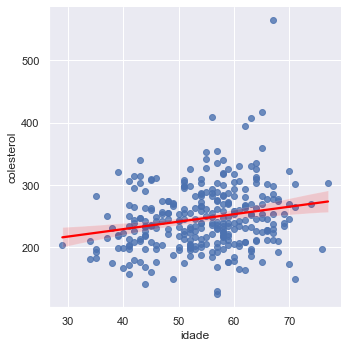

In [45]:
sns.set()
plt.figure(figsize=(10,5))

sns.lmplot(x='idade', y='colesterol', data=colesterol,
          line_kws={'color':'red'})
plt.show()

## Machine Learning

### Utilizando o Algoritmo de Classificação Árvore de Decisão para a base de dados Diabetes

#### Definindo as features (dados de entrada) e os labels (dados de saída)

In [46]:
x = diabetes.drop('resultado',axis=1)
y = diabetes['resultado']

#### Criação de bases de treino e de teste

In [47]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

#### Modelo de Classificação

In [48]:
# criando o modelo
arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [49]:
# treinando o modelo
arvore.fit(x_treino, y_treino)

# criando as previsoes
y_pred = arvore.predict(x_teste)

#### Avaliação do modelo

In [50]:
acuracia = arvore.score(x_teste, y_teste)
acuracia = round(acuracia, 3)*100
print(f'A acuracia do modelo é de {acuracia}%')

A acuracia do modelo é de 75.0%


[Text(0.5, 0.875, 'X[1] <= 127.5\ngini = 0.454\nsamples = 576\nvalue = [375, 201]'),
 Text(0.25, 0.625, 'X[7] <= 28.5\ngini = 0.304\nsamples = 358\nvalue = [291, 67]'),
 Text(0.125, 0.375, 'X[5] <= 30.95\ngini = 0.135\nsamples = 193\nvalue = [179, 14]'),
 Text(0.0625, 0.125, 'gini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.1875, 0.125, 'gini = 0.249\nsamples = 89\nvalue = [76, 13]'),
 Text(0.375, 0.375, 'X[5] <= 27.0\ngini = 0.436\nsamples = 165\nvalue = [112, 53]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 129\nvalue = [78, 51]'),
 Text(0.75, 0.625, 'X[5] <= 29.95\ngini = 0.474\nsamples = 218\nvalue = [84, 134]'),
 Text(0.625, 0.375, 'X[1] <= 145.5\ngini = 0.434\nsamples = 66\nvalue = [45, 21]'),
 Text(0.5625, 0.125, 'gini = 0.284\nsamples = 35\nvalue = [29, 6]'),
 Text(0.6875, 0.125, 'gini = 0.499\nsamples = 31\nvalue = [16, 15]'),
 Text(0.875, 0.375, 'X[1] <= 165.5\ngini = 0.381\nsamples = 152\nvalue 

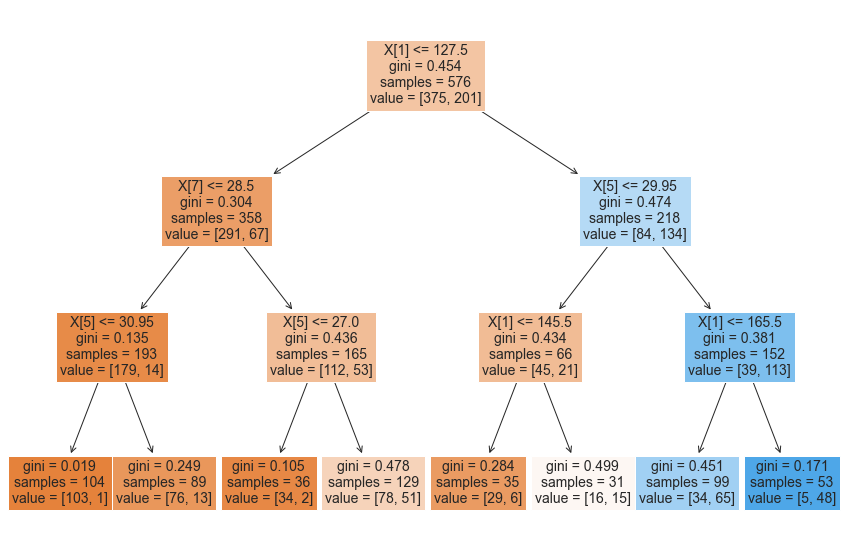

In [51]:
plt.figure(figsize=(15,10))
tree.plot_tree(arvore, filled=True, fontsize=14)

#### Comparando com o Algoritmo DummyClassifier

In [52]:
dummy = DummyClassifier(strategy='most_frequent')

In [53]:
dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [54]:
dummy.score(x_teste, y_teste)

0.6510416666666666

Conseguimos verificar que a acurácia do nosso modelo com o algoritmo de classificação Árvore de Decisão (71,89%) é maior do que do algoritmo dummy (63%). 

### Utilizando o Algoritmo de Regressão Linear para a base de dados Batimentos cardíacos

<Figure size 7200x3600 with 0 Axes>

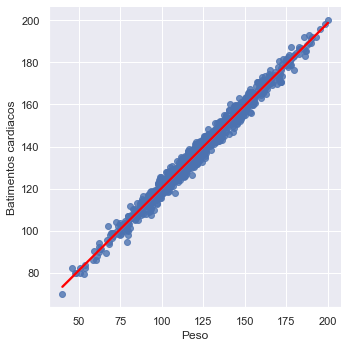

In [55]:
plt.figure(figsize=(100,50))

sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos,
          line_kws={'color':'red'})
plt.show()

#### Definindo as features (dados de entrada) e os labels (dados de saída)

In [56]:
x = batimentos[['Peso', 'Idade']]
y = batimentos['Batimentos cardiacos']

#### Criação de bases de treino e de teste

In [57]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

#### Modelo de Regressão

In [58]:
# criando o modelo
regressao = linear_model.LinearRegression(fit_intercept = False, normalize=True)

In [59]:
# treinando o modelo
regressao.fit(x_treino, y_treino)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(fit_intercept=False, normalize=True)

#### Avaliação do Modelo

In [60]:
acuracia = regressao.score(x_teste, y_teste)

In [61]:
print(f'A acuracia do modelo é de {round(acuracia, 3)*100}%')

A acuracia do modelo é de 98.5%


### Utilizando o Algoritmo de Clusterização KMeans para a base de dados Colesterol

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

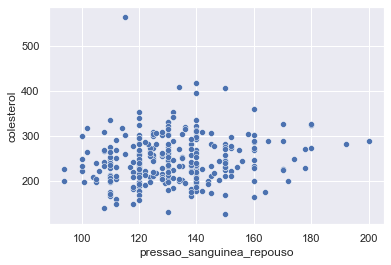

In [62]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol)

#### Modelo de Clusterização

In [63]:
# a base de dados será separada em 2 grupos
kmeans = KMeans(n_clusters = 2)

In [64]:
# modelo rodará com todas as variáveis
x = colesterol

In [65]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   idade                         303 non-null    int64   
 1   genero                        303 non-null    int64   
 2   tipo_dor_peito                303 non-null    int64   
 3   pressao_sanguinea_repouso     303 non-null    int64   
 4   acucar_jejum                  303 non-null    int64   
 5   resultado_eletrocardio        303 non-null    int64   
 6   freq_cardio_max               303 non-null    int64   
 7   angina_exercicio              303 non-null    int64   
 8   depressao_induzida_exercicio  303 non-null    float64 
 9   inclinacao                    303 non-null    int64   
 10  num_princ_vasos               303 non-null    object  
 11  thal                          303 non-null    object  
 12  diag_doenca_cardiaca          303 non-null    int6

In [66]:
# selecionadas somente as variaveis inteiras
x = colesterol.select_dtypes('int64')

In [67]:
# treinando o modelo
kmeans.fit(x)

KMeans(n_clusters=2)

In [68]:
# criando as previsoes
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

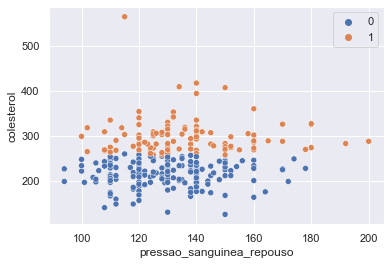

In [69]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol, hue= kmeans.labels_)

In [70]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,faixa_colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,2,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,3,1
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,2,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,2,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,2,0


In [71]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64

Os pacientes da base de dados Colesterol foi separada em 2 grupos / clusters:

  - **Cluster 0: pessoas com média de colesterol 298.96**

  - **Cluster 1: pessoas com média de colesterol 216.47**